```
RD2O ~ 1e-2
    PIPG = 1e-4
    Mosek = 1e-3
    ECOS = 1e-3
    Gurobi = 1e-3
    SCS = 1e-3
```

# Three obstacle quadrotor path planning - stopping criteria matching

In [22]:
load_termination_criteria = true
j = 0
ϵ_tol = [1e-2,1e-3,1e-4,1e-5,1e-6,1e-7]
rd2o = zeros(length(ϵ_tol))
dye = zeros(length(ϵ_tol))
rd2o2 = zeros(length(ϵ_tol))
dye2 = zeros(length(ϵ_tol))
rd2o3 = zeros(length(ϵ_tol))
dye3 = zeros(length(ϵ_tol))
rd2o4 = zeros(length(ϵ_tol))
dye4 = zeros(length(ϵ_tol))
rd2o5 = zeros(length(ϵ_tol))
dye5 = zeros(length(ϵ_tol))
rd2o6 = zeros(length(ϵ_tol))
dye6 = zeros(length(ϵ_tol))
iter_count = zeros(length(ϵ_tol));

In [ ]:
# set ground truth precision
ϵ_pd_JuMP = 1e-9 
ϵ_gap_JuMP = 1e-9

# set baseline PIPG precision
ϵ_primal = 1e-4
ϵ_dual = 1e-4
# ϵ_admm = 1e-5
# ϵ_admm_dual = 1e-5

# load modules
include("ex11_data.jl");
@load_file "pipg_suite.jl" true
@load_file "pipg_var.jl" true
@load_file "execute_utils.jl" true

# ground truth
exe_utils.execute_JuMP!(:mosek); print("\n")

In [ ]:
for j=1:length(ϵ_tol) 
    # PIPG
    rd2o[j],dye[j],iter_count[j] = exe_utils.execute_PIPG!(false,0.0,ϵ_tol[j],ϵ_tol[j]); print("\n")
    
    # MOSEK
    slvr2 = :mosek
    exe_utils.execute_JuMP_proxy!(iX.xopt2,iX.uopt2,nothing,nothing,nothing,nothing,slvr2,ϵ_tol[j],ϵ_tol[j]); print("\n")
    rd2o2[j],dye2[j] = utils.compute_error(iX.xopt2,iX.uopt2,iX.xopt,iX.uopt,false,:unscaled,0)
end

In [29]:
j += 1
@assert j ≤ length(ϵ_tol)

# set ground truth precision
ϵ_pd_JuMP = 1e-9 
ϵ_gap_JuMP = 1e-9

# set PIPG precision
ϵ_primal = ϵ_tol[j]
ϵ_dual = ϵ_tol[j]
ϵ_admm = 0.1*ϵ_tol[j]
ϵ_admm_dual = 0.1*ϵ_tol[j]

# load modules
include("ex11_data.jl");
@load_file "pipg_suite.jl" true
@load_file "pipg_var.jl" true
@load_file "execute_utils.jl" true

exe_utils.execute_JuMP!(:mosek); print("\n")

rd2o[j],dye[j],iter_count[j] = exe_utils.execute_PIPG!(); print("\n")

ϵ_pd_JuMP = ϵ_tol[j]
ϵ_gap_JuMP = ϵ_tol[j]

slvr2 = :mosek
exe_utils.execute_JuMP_proxy!(iX.xopt2,iX.uopt2,nothing,nothing,nothing,nothing,slvr2,ϵ_pd_JuMP,ϵ_gap_JuMP); print("\n")
rd2o2[j],dye2[j] = utils.compute_error(iX.xopt2,iX.uopt2,iX.xopt,iX.uopt,false,:unscaled,0)

ϵ_pd_JuMP = ϵ_tol[j]
ϵ_gap_JuMP = ϵ_tol[j]

slvr5 = :gurobi
exe_utils.execute_JuMP_proxy!(iX.xopt2,iX.uopt2,nothing,nothing,nothing,nothing,slvr5,ϵ_pd_JuMP,ϵ_gap_JuMP); print("\n")
rd2o5[j],dye5[j] = utils.compute_error(iX.xopt2,iX.uopt2,iX.xopt,iX.uopt,false,:unscaled,0)

slvr3_idx = [1,2,3,4,5,6]
if j ∈ slvr3_idx
    ϵ_pd_JuMP = ϵ_tol[j]
    ϵ_gap_JuMP = ϵ_tol[j]

    slvr3 = :ecos
    exe_utils.execute_JuMP_proxy!(iX.xopt2,iX.uopt2,nothing,nothing,nothing,nothing,slvr3,ϵ_pd_JuMP,ϵ_gap_JuMP); print("\n")
    rd2o3[j],dye3[j] = utils.compute_error(iX.xopt2,iX.uopt2,iX.xopt,iX.uopt,false,:unscaled,0)
end

slvr4_idx = [1,2,3]
if j ∈ slvr4_idx
    ϵ_pd_JuMP = ϵ_tol[j]
    ϵ_gap_JuMP = ϵ_tol[j]    
    
    slvr4 = :cosmo
    exe_utils.execute_JuMP_proxy!(iX.xopt2,iX.uopt2,nothing,nothing,nothing,nothing,slvr4,ϵ_pd_JuMP,ϵ_gap_JuMP); print("\n")
    rd2o4[j],dye4[j] = utils.compute_error(iX.xopt2,iX.uopt2,iX.xopt,iX.uopt,false,:unscaled,0)
end

ϵ_pd_JuMP = ϵ_tol[j]
ϵ_gap_JuMP = ϵ_tol[j]

slvr6 = :scs
exe_utils.execute_JuMP_proxy!(iX.xopt2,iX.uopt2,nothing,nothing,nothing,nothing,slvr6,ϵ_pd_JuMP,ϵ_gap_JuMP); print("\n")
rd2o6[j],dye6[j] = utils.compute_error(iX.xopt2,iX.uopt2,iX.xopt,iX.uopt,false,:unscaled,0);

LoadError: AssertionError: j ≤ length(ϵ_tol)

# Visualization

In [30]:
using Plots
pgfplotsx();

## Relative distance to optimum

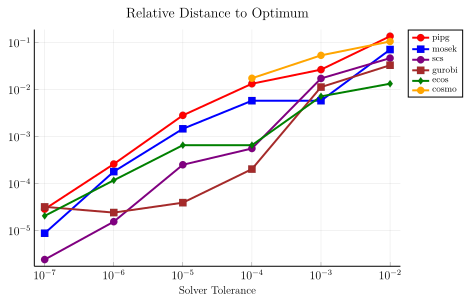

In [31]:
plot(ϵ_tol,rd2o,line=:solid,color=:red,lw=2,marker=:circle,markersize=5,lab="pipg",xaxis=:log,yaxis=:log)
plot!(ϵ_tol,rd2o2,line=:solid,color=:blue,lw=2,marker=:square,markersize=5,lab=String(slvr2),xaxis=:log,yaxis=:log)
plot!(ϵ_tol,rd2o6,line=:solid,color=:purple,lw=2,marker=:circle,markersize=5,lab=String(slvr6),xaxis=:log,yaxis=:log)
plot!(ϵ_tol,rd2o5,line=:solid,color=:brown,lw=2,marker=:square,markersize=5,lab=String(slvr5),xaxis=:log,yaxis=:log)
plot!(ϵ_tol[slvr3_idx],rd2o3[slvr3_idx],line=:solid,color=:green,lw=2,marker=:diamond,markersize=5,lab=String(slvr3),xaxis=:log,yaxis=:log)
plot!(ϵ_tol[slvr4_idx],rd2o4[slvr4_idx],line=:solid,color=:orange,lw=2,marker=:dot,markersize=5,lab=String(slvr4),xaxis=:log,yaxis=:log)
plot!(title="Relative Distance to Optimum",xlabel="Solver Tolerance")

## Dynamics Error

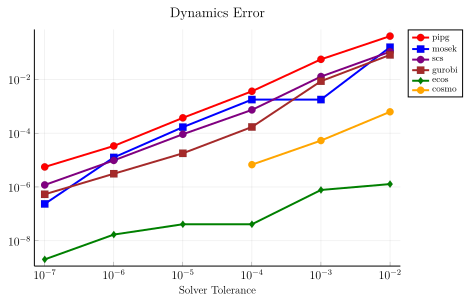

In [33]:
plot(ϵ_tol,dye,line=:solid,color=:red,lw=2,marker=:circle,markersize=5,lab="pipg",xaxis=:log,yaxis=:log)
plot!(ϵ_tol,dye2,line=:solid,color=:blue,lw=2,marker=:square,markersize=5,lab=String(slvr2),xaxis=:log,yaxis=:log)
plot!(ϵ_tol,dye6,line=:solid,color=:purple,lw=2,marker=:circle,markersize=5,lab=String(slvr6),xaxis=:log,yaxis=:log)
plot!(ϵ_tol,dye5,line=:solid,color=:brown,lw=2,marker=:square,markersize=5,lab=String(slvr5),xaxis=:log,yaxis=:log)
plot!(ϵ_tol[slvr3_idx],dye3[slvr3_idx],line=:solid,color=:green,lw=2,marker=:diamond,markersize=5,lab=String(slvr3),xaxis=:log,yaxis=:log)
plot!(ϵ_tol[slvr4_idx],dye4[slvr4_idx],line=:solid,color=:orange,lw=2,marker=:dot,markersize=5,lab=String(slvr4),xaxis=:log,yaxis=:log)
plot!(title="Dynamics Error",xlabel="Solver Tolerance")